In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matching import hamming_distance_absolute_flatten, shifted_hamming, shifted_hamming_all_values
import os

0.5234375
0.2578125
0.328125
0.3203125
0.3828125
0.234375
0.296875
0.296875
0.28125
0.3359375
0.25
0.1328125
0.140625
0.390625
0.3671875
0.34375
0.328125
0.09375
0.09375
0.2265625
0.1171875
0.0703125
0.1328125
0.15625
0.1328125
0.1484375
0.3671875
0.359375
0.3125
0.3359375
0.328125
0.2578125
0.375
0.328125
0.34375
0.0625
0.1796875
0.1796875
0.390625
0.125
0.3046875
0.3046875
0.1875
0.15625
0.2421875
0.3515625
0.1171875
0.109375
0.109375
0.078125
0.1171875
0.1484375
0.0703125
0.3671875
0.34375
0.359375
0.375
0.328125
0.359375
0.1171875
0.09375
0.0703125
0.046875
0.0625
0.203125
0.234375
0.234375
0.1953125
0.21875
0.2421875
0.265625
0.390625
0.390625
0.375
0.1484375
0.078125
0.3125
0.2109375
0.3359375
0.2890625
0.28125
0.390625
0.109375
0.1328125
0.1015625
0.3828125
0.3828125
0.375
0.34375
0.328125
0.34375
0.0859375
0.0703125
0.09375
0.1328125
0.1796875
0.1640625
0.15625
0.2109375
0.3515625
0.3671875
0.3359375
0.1328125
0.3203125
0.359375
0.265625
0.1171875
0.15625
0.1328125
0.15625
0.31

Text(0.5, 1.0, 'Histogram of Values')

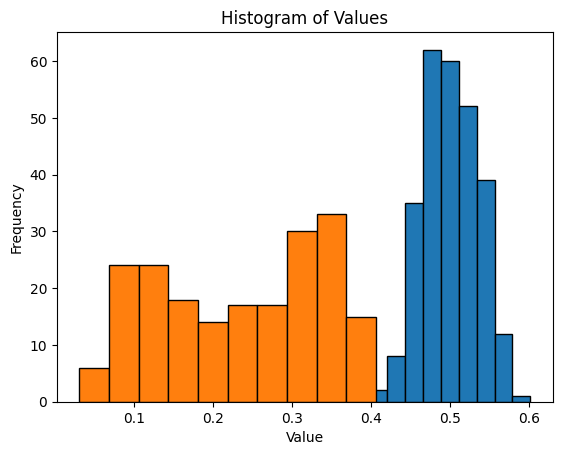

In [24]:
import os
import numpy as np

# Specify the directory where the images are located
directory = "iriscodes"

baseline_made = 0

all_values = []

total_match = 0
total_pred = 0

random_array = np.random.randint(2, size=128)

uncorrelated_values = []

total_match = 0
total_pred = 0

for filename in os.listdir(directory):
    if filename.endswith(".npy"):
        filepath = os.path.join(directory, filename)
        code2 = np.load(filepath)
        ham_dist = hamming_distance_absolute_flatten(random_array, code2)
        
        pred = ham_dist / (len(code2[0]) * len(code2))

        uncorrelated_values.append(pred)


print(uncorrelated_values[0])

# Plotting the histogram
plt.hist(uncorrelated_values, bins=10, edgecolor='black')


# Loop from 1 to 79 for the 'Img' numbers
for i in range(1, 80):
    # Loop over 'L' and 'R' 
    for side in ['L', 'R']:
        # Loop from 1 to 6 for the last number
        baseline_made = 0
        for j in range(1, 7):
            # Construct the filename pattern
            filename_pattern = f"Img_{str(i).zfill(3)}_{side}_{j}" 
            

            # Scan through all files in the directory
            with os.scandir(directory) as entries:
                for entry in entries:
                    # Check if the filename starts with the specified pattern
                    if entry.is_file() and entry.name.startswith(filename_pattern):
                        filepath = os.path.join(directory, entry.name)
                        
                        if(baseline_made == 0):
                            baseline_made = 1
                            code1 = np.load(filepath)
                            #print(filepath)
                        else:
                            code2 = np.load(filepath)
                            ham_dist_all_rotations = shifted_hamming_all_values(code1, code2)
        
                            best_ham_dist = min(ham_dist_all_rotations)

                            #print(code2)

                            pred = best_ham_dist / (len(code1[0]) * len(code1))

                            all_values.append(pred)

                            print(pred)

                            total_pred = total_pred + pred

                            matched = False

                            if(pred < 0.34):
                                matched = True
                                total_match = total_match + 1



print(all_values)

print(np.mean(all_values))

# Plotting the histogram
plt.hist(all_values, bins=10, edgecolor='black', align='mid')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

0.4609375
[[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]]
[[0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 1. 0.

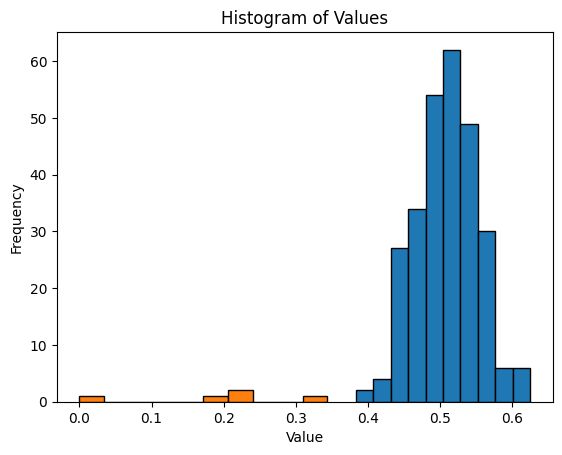

In [2]:
directory = 'iriscodes'

#zeros_array = np.zeros(128)
random_array = np.random.randint(2, size=128)

all_values = []

total_match = 0
total_pred = 0

for filename in os.listdir(directory):
    if filename.endswith(".npy"):
        filepath = os.path.join(directory, filename)
        code2 = np.load(filepath)
        ham_dist = hamming_distance_absolute_flatten(random_array, code2)
        
        pred = ham_dist / (len(code2[0]) * len(code2))

        all_values.append(pred)


print(all_values[0])

# Plotting the histogram
plt.hist(all_values, bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Displaying the plot
#plt.show()




code1 = np.load("iriscodes/Img_068_L_1_1.npy")
first_iris_comparison = []

for filename in os.listdir(directory):
    if filename.endswith(".npy") and filename.startswith("Img_068_L"):
        filepath = os.path.join(directory, filename)
        code2 = np.load(filepath)
        ham_dist_all_rotations = shifted_hamming_all_values(code1, code2)
        
        best_ham_dist = min(ham_dist_all_rotations)

        print(code2)

        pred = best_ham_dist / (len(code1[0]) * len(code1))

        total_pred = total_pred + pred

        matched = False

        if(pred < 0.34):
            matched = True
            total_match = total_match + 1


        first_iris_comparison.append(pred)



# Plotting the histogram
plt.hist(first_iris_comparison, bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Displaying the plot
#plt.show()

for i in range(1, 80):
    for side in ['L', 'R']:
        filename = f"Img_{i:03}_{side}"
        print(filename)




average_ham_dist = total_pred / len(os.listdir(directory))

print(average_ham_dist)

print(total_match)

#print(code1)

[[0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.]]
[[0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]]


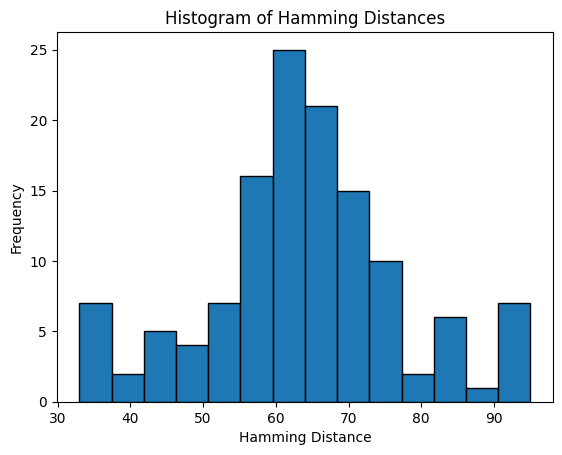

33


In [8]:
code1 = np.load("iriscodes/Img_001_L_1_1.npy")
code2 = np.load("iriscodes/Img_001_L_2_1.npy")

print(code1)
print(code2)

hamming_distances_shifted = shifted_hamming_all_values(code1, code2)

# Plot histogram
plt.hist(hamming_distances_shifted, bins='auto', edgecolor='black')
plt.title("Histogram of Hamming Distances")
plt.xlabel("Hamming Distance")
plt.ylabel("Frequency")
plt.show()

print(min(hamming_distances_shifted))

In [ ]:
for i in range(1, 80): 
    for side in ['L', 'R']:
        filename = f"Img_{i:03}_{side}"
        print(filename)




code1 = np.load("iriscodes/Img_001_L_1_1.npy")
first_iris_comparison = []

for filename in os.listdir(directory):
    if filename.endswith(".npy") and filename.startswith("Img_001_L"):
        filepath = os.path.join(directory, filename)
        code2 = np.load(filepath)
        ham_dist_all_rotations = shifted_hamming_all_values(code1, code2)
        
        best_ham_dist = min(ham_dist_all_rotations)

        print(code2)

        pred = best_ham_dist / (len(code1[0]) * len(code1))

        total_pred = total_pred + pred

        matched = False

        if(pred < 0.34):
            matched = True
            total_match = total_match + 1


        first_iris_comparison.append(pred)

In [2]:
def hamming_distance_absolute(iris_code1, iris_code2):
    if len(iris_code1) != len(iris_code2):
        raise ValueError("IrisCodes must be of the same length")
    return sum(c1 != c2 for c1, c2 in zip(iris_code1, iris_code2))


def hamming_distance_percentage(code1, code2):
    if len(code1) != len(code2):
        raise ValueError("IrisCodes must be of the same length")
        
    mismatches = sum(c1 != c2 for c1, c2 in zip(code1, code2))
    total_length = len(code1)
    
    # calculate percentage of mismatches
    percentage = (mismatches / total_length) * 100
    
    return percentage



iris_code1 = [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
iris_code2 = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1]

print(hamming_distance_absolute(iris_code1, iris_code2))  # Output: 3
print(f'{hamming_distance_percentage(iris_code1, iris_code2)}%') # Output: 30 % 



3
30.0%


In [3]:
def hamming_distance_absolute_weighted(iris_code1, iris_code2, weights):
    if len(iris_code1) != len(iris_code2):
        raise ValueError("IrisCodes and weights must be of the same length")

    weighted_mismatches = sum((c1 != c2) * weight for c1, c2, weight in zip(iris_code1, iris_code2, weights))
    return weighted_mismatches


def hamming_distance_percentage_weighted(code1, code2, weights):
    if len(code1) != len(code2):
        raise ValueError("IrisCodes and weights must be of the same length")

    total_weight = sum(weights)

    if total_weight == 0:
        return 0

    weighted_mismatches = sum((c1 != c2) * weight for c1, c2, weight in zip(code1, code2, weights))

    # calculate percentage of weighted mismatches
    percentage = (weighted_mismatches / total_weight) * 100

    return percentage


iris_code1 = [0, 1, 0, 1, 1, 0, 1, 0, 0]
iris_code2 = [0, 0, 1, 1, 1, 0, 1, 0, 1]

segment_length = 3  # Define the length of each segment
weights = [1, 2, 3]  # Define the weights for each position

# Check if iris codes and weights have the correct length
if len(iris_code1) % segment_length != 0 or len(iris_code2) % segment_length != 0 or len(weights) != segment_length:
    raise ValueError("Invalid length of iris codes or weights")

# Compare segments of iris_code1 with iris_code2
num_segments = len(iris_code1) // segment_length
for i in range(num_segments):
    start_index = i * segment_length
    end_index = start_index + segment_length
    segment1 = iris_code1[start_index:end_index]
    segment2 = iris_code2[start_index:end_index]

    print(f"Segment {i+1}:")
    print("Hamming distance:", hamming_distance_absolute_weighted(segment1, segment2, weights))
    print("Hamming distance fail percentage:", f'{hamming_distance_percentage_weighted(segment1, segment2, weights)}%')
    print()


Segment 1:
Hamming distance: 5
Hamming distance fail percentage: 83.33333333333334%

Segment 2:
Hamming distance: 0
Hamming distance fail percentage: 0.0%

Segment 3:
Hamming distance: 3
Hamming distance fail percentage: 50.0%



In [4]:
def hamming_distance_absolute_weighted(iris_code1, iris_code2, weights):
    if len(iris_code1) != len(iris_code2):
        raise ValueError("IrisCodes and weights must be of the same length")

    weighted_mismatches = sum((c1 != c2) * weight for c1, c2, weight in zip(iris_code1, iris_code2, weights))
    return weighted_mismatches


def hamming_distance_percentage_weighted(code1, code2, weights):
    if len(code1) != len(code2):
        raise ValueError("IrisCodes and weights must be of the same length")

    total_weight = sum(weights)

    if total_weight == 0:
        return 0

    weighted_mismatches = sum((c1 != c2) * weight for c1, c2, weight in zip(code1, code2, weights))

    # calculate percentage of weighted mismatches
    percentage = (weighted_mismatches / total_weight) * 100

    return percentage


iris_code1 = [0, 1, 0, 1, 1, 0, 1, 0, 0]
iris_code2 = [0, 0, 1, 1, 1, 0, 1, 0, 1]

segment_length = 3  # Define the length of each segment
weights = [1, 1, 1]  # Define the weights for each position

# Check if iris codes and weights have the correct length
if len(iris_code1) % segment_length != 0 or len(iris_code2) % segment_length != 0 or len(weights) != segment_length:
    raise ValueError("Invalid length of iris codes or weights")

# Compare segments of iris_code1 with iris_code2
num_segments = len(iris_code1) // segment_length

for i in range(num_segments):
    start_index1 = i * segment_length
    end_index1 = start_index1 + segment_length
    segment1 = iris_code1[start_index1:end_index1]

    start_index2 = i * segment_length
    end_index2 = start_index2 + segment_length
    segment2 = iris_code2[start_index2:end_index2]

    print(f"Segment {i+1} compared to {i+1}:")
    print("Hamming distance:", hamming_distance_absolute_weighted(segment1, segment2, weights))
    print("Hamming distance fail percentage:", f'{hamming_distance_percentage_weighted(segment1, segment2, weights)}%')
    print()


Segment 1 compared to 1:
Hamming distance: 2
Hamming distance fail percentage: 66.66666666666666%

Segment 2 compared to 2:
Hamming distance: 0
Hamming distance fail percentage: 0.0%

Segment 3 compared to 3:
Hamming distance: 1
Hamming distance fail percentage: 33.33333333333333%



In [5]:
def hamming_distance_absolute_weighted(iris_code1, iris_code2, weights):
    if len(iris_code1) != len(iris_code2):
        raise ValueError("IrisCodes and weights must be of the same length")

    weighted_mismatches = sum((c1 != c2) * weight for c1, c2, weight in zip(iris_code1, iris_code2, weights))
    return weighted_mismatches


def hamming_distance_percentage_weighted(code1, code2, weights):
    if len(code1) != len(code2):
        raise ValueError("IrisCodes and weights must be of the same length")

    total_weight = sum(weights)

    if total_weight == 0:
        return 0

    weighted_mismatches = sum((c1 != c2) * weight for c1, c2, weight in zip(code1, code2, weights))

    # calculate percentage of weighted mismatches
    percentage = (weighted_mismatches / total_weight) * 100

    return percentage


iris_code1 = [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1]
iris_code2 = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]

segment_length = 4  # Define the length of each segment
weights = [1, 1, 1, 1]  # Define the weights for each position

# Check if iris codes and weights have the correct length
if len(iris_code1) % segment_length != 0 or len(iris_code2) % segment_length != 0 or len(weights) != segment_length:
    raise ValueError("Invalid length of iris codes or weights")

# Get the first segment of iris_code1
start_index1 = 0
end_index1 = segment_length
segment1 = iris_code1[start_index1:end_index1]

# Compare the first segment of iris_code1 with all segments of iris_code2 until a complete match is found
num_segments = len(iris_code2) // segment_length
for i in range(num_segments):
    start_index2 = i * segment_length
    end_index2 = start_index2 + segment_length
    segment2 = iris_code2[start_index2:end_index2]

    print(f"Segment 1 compared to Segment {i+1}:")
    print("Hamming distance:", hamming_distance_absolute_weighted(segment1, segment2, weights))
    print("Hamming distance fail percentage:", f'{hamming_distance_percentage_weighted(segment1, segment2, weights)}%')
    print()

    # Check if a complete match is found
    if hamming_distance_absolute_weighted(segment1, segment2, weights) == 0:
        print("Complete match found!")
        break


Segment 1 compared to Segment 1:
Hamming distance: 2
Hamming distance fail percentage: 50.0%

Segment 1 compared to Segment 2:
Hamming distance: 4
Hamming distance fail percentage: 100.0%

Segment 1 compared to Segment 3:
Hamming distance: 2
Hamming distance fail percentage: 50.0%



In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [7]:
from IrisSegmentation import FindPupilIris, LocateEyelids, LocateEyelids2, EyelidFitter
from util import rgbtogray, transform_iris
from iriscode import calculate_iris_code
%load_ext autoreload
%autoreload 2

theta_psize = 15
n_theta_patches = 8
rho_psize = 15
n_rho_patches = 8

#img_use = cv2.imread("UTIRIS_infrared/021/021_L/Img_021_L_5.bmp").astype(np.double)[: , :, 0] / 255

ModuleNotFoundError: No module named 'skimage'

In [ ]:
name1 = "UTIRIS_infrared/021/021_L/Img_021_L_5.bmp"
name2 = "UTIRIS_infrared/021/021_L/Img_021_L_3.bmp"

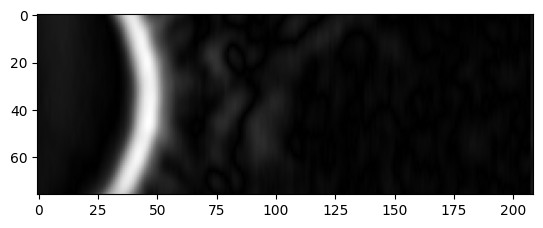

dist right:  52.5
dist right:  52.5


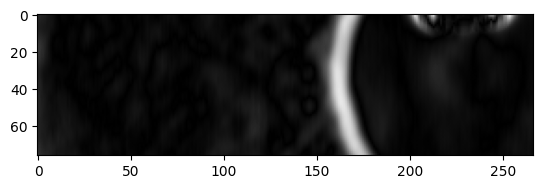

dist left:  103.0


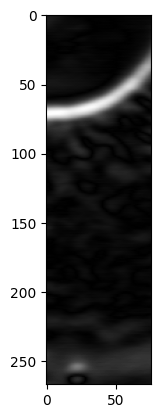

dist top:  73.0


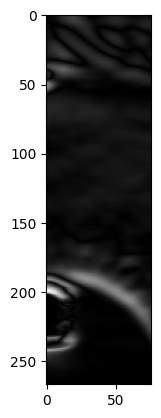

dist bottom:  67.0


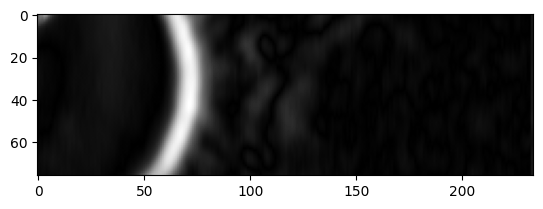

dist right:  77.5
dist right:  77.5


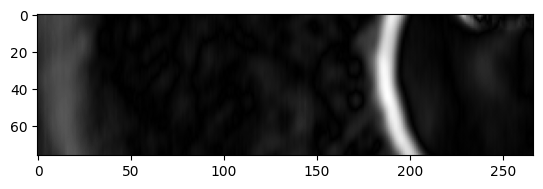

dist left:  78.0


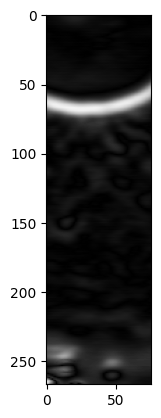

dist top:  74.0


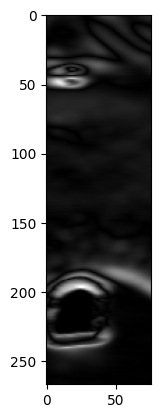

dist bottom:  74.0


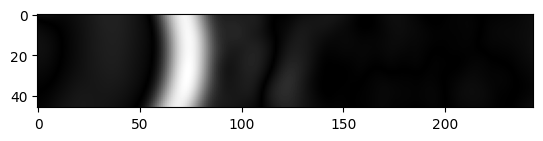

79.0 79.0


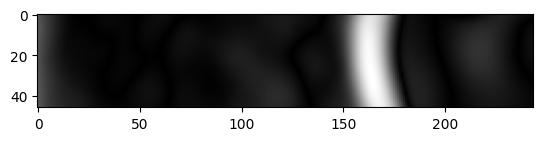

93.0 169.0
Estimated pupil radius:  86
Estimated pupil center:  [375, 670]
Optimal location and radius:  
x=664.0
y=369.0
r=79.0
Estimated iris radius:  234
Optimal location and radius:  
x=671.0
y=376.0
r=258.0


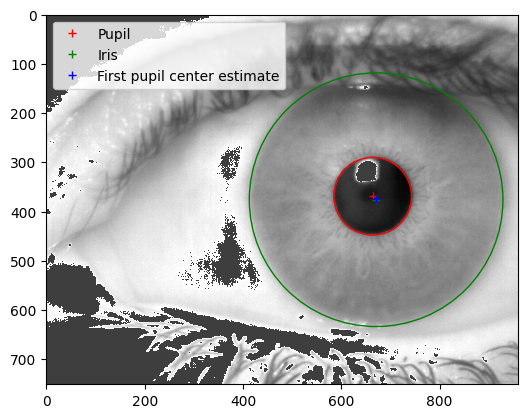

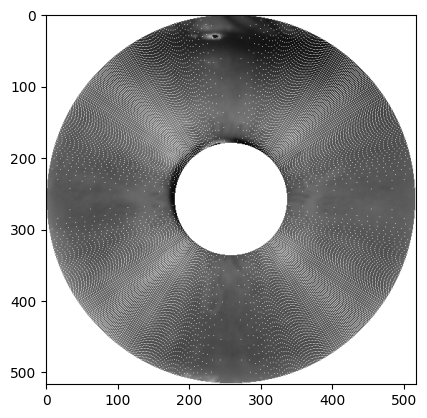

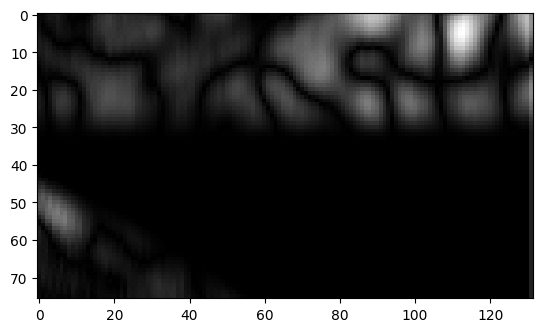

dist right:  40.0
dist right:  40.0


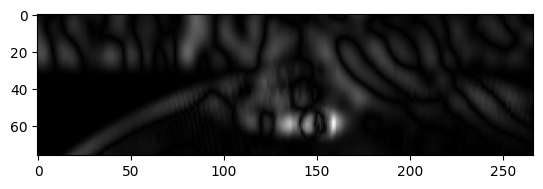

dist left:  145.0


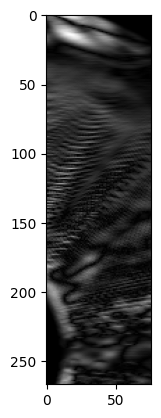

dist top:  28.0


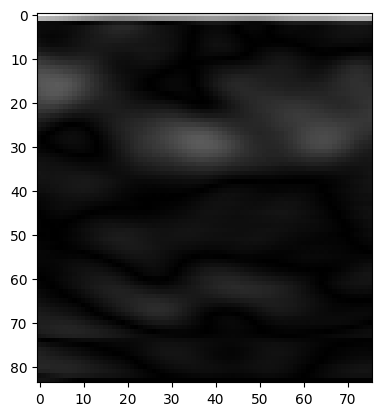

dist bottom:  54.0


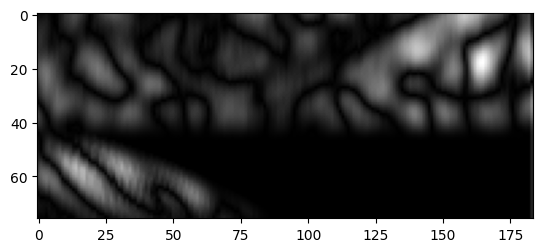

dist right:  135.0
dist right:  135.0


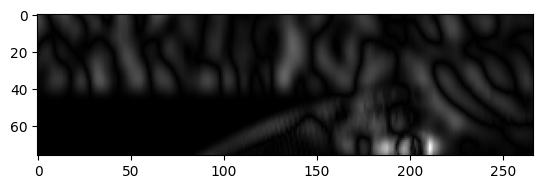

dist left:  111.5


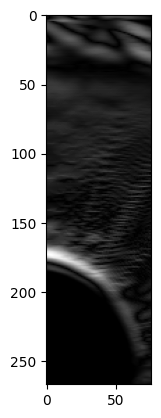

dist top:  186.0


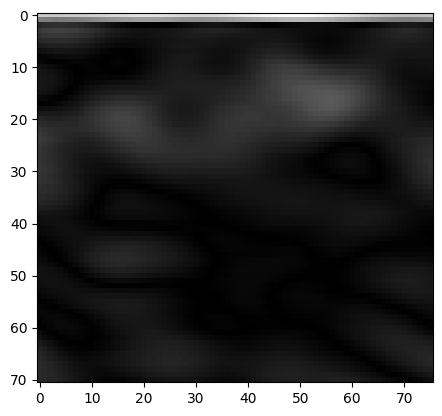

dist bottom:  9.0


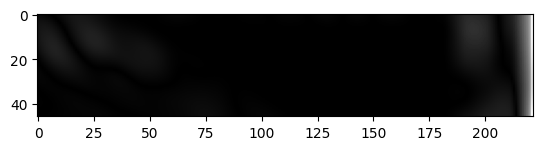

227.0 227.0


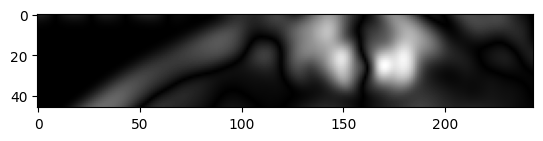

85.0 177.0
Estimated pupil radius:  156
Estimated pupil center:  [148, 732]
Optimal location and radius:  
x=739.0
y=166.0
r=152.0
Estimated iris radius:  407
Optimal location and radius:  
x=744.0
y=161.0
r=414.0


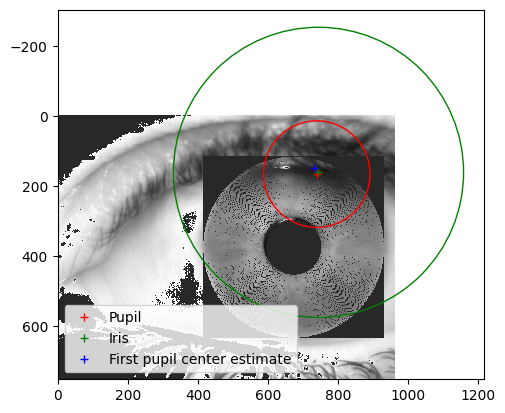

IndexError: boolean index did not match indexed array along dimension 0; dimension is 576 but corresponding boolean dimension is 829

In [ ]:
img1 = rgbtogray(cv2.imread(name1).astype(np.double)/255.)
img2 = rgbtogray(cv2.imread(name2).astype(np.double)/255.)

pup_center1, pup_r1, iris_center1, iris_r1 = FindPupilIris(img1, filter_size=3, sigma=1.0, lateral=True, plot_img=None)

transf_img1 = transform_iris(img1, pup_center1, pup_r1, iris_center1, iris_r1, theta_res = theta_psize*n_theta_patches, 
                            rho_res = rho_psize*n_rho_patches,method = "Daug", plot = True)
iriscode1 = calculate_iris_code(transf_img1, theta_psize=theta_psize, r_psize=rho_psize, alpha=0.4, omega=4)

pup_center2, pup_r2, iris_center2, iris_r2 = FindPupilIris(img1, filter_size=3, sigma=1.0, lateral=True, plot_img=None)

transf_img2 = transform_iris(img2, pup_center2, pup_r2, iris_center2, iris_r2, theta_res = theta_psize*n_theta_patches, 
                            rho_res = rho_psize*n_rho_patches,method = "Daug", plot = True)
iriscode2 = calculate_iris_code(transf_img1, theta_psize=theta_psize, r_psize=rho_psize, alpha=0.4, omega=4)

print(iriscode1)
print(iriscode2)


In [8]:
from IrisSegmentation import FindPupilIris, LocateEyelids, LocateEyelids2, EyelidFitter
from util import rgbtogray, transform_iris
from iriscode import calculate_iris_code
from matching import hamming_distance_absolute

theta_psize = 15
n_theta_patches = 8
rho_psize = 15
n_rho_patches = 8

name1 = "UTIRIS_infrared/021/021_L/Img_021_L_1.bmp"
name2 = "UTIRIS_infrared/021/021_L/Img_021_L_3.bmp"

img = rgbtogray(cv2.imread(name1).astype(np.double)/255.)
img2 = rgbtogray(cv2.imread(name2).astype(np.double)/255.)


pup_center, pup_r, iris_center, iris_r = FindPupilIris(img, filter_size=3, sigma=1.0, lateral=True, plot_img=None)
pup_center2, pup_r2, iris_center2, iris_r2 = FindPupilIris(img2, filter_size=3, sigma=1.0, lateral=True, plot_img=None)


transf_img = transform_iris(img, pup_center, pup_r, iris_center, iris_r,
                            theta_res = theta_psize*n_theta_patches,
                            rho_res = rho_psize*n_rho_patches,
                            method = "Daug", plot = False)

transf_img2 = transform_iris(img2, pup_center2, pup_r2, iris_center2, iris_r2,
                            theta_res = theta_psize*n_theta_patches,
                            rho_res = rho_psize*n_rho_patches,
                            method = "Daug", plot = False)


iriscode = calculate_iris_code(transf_img, theta_psize=theta_psize, r_psize=rho_psize, 
                alpha=0.4, omega=4)

iriscode2 = calculate_iris_code(transf_img2, theta_psize=theta_psize, r_psize=rho_psize, 
                alpha=0.4, omega=4)

ham_dist = hamming_distance_absolute(iriscode, iriscode2)

matching_iris = False;

pred = ham_dist / len(iriscode)

if(pred < 0.30):
    matching_iris = True;

print(iriscode)
print(iriscode2)

print(ham_dist / len(iriscode))
print("Iris matching = ")
print(matching_iris)

ModuleNotFoundError: No module named 'skimage'

array([[0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.]])